### Домашнее задание №7###

**Многомерный статистический анализ. Линейная регрессия**

**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
c_score = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [2]:
x = salary.reshape(10,1)
y = c_score.reshape(10,1)

b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)[0,0]
b

5.889820420132688

In [3]:
# расчет с intercept
x = salary
y = c_score
bb = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - bb * np.mean(x)
a,bb

(444.1773573243596, 2.620538882402765)

In [4]:
print(f'\tX\tY\tY_pred\t\t\tY_pred_intercept')
for ind in range(len(salary)):
    print(f'{ind+1}\t{x[ind]}\t{y[ind]}\t{x[ind]*b}\t{a+x[ind]*bb}')

	X	Y	Y_pred			Y_pred_intercept
1	35	401	206.14371470464408	535.8962182084564
2	45	574	265.041918905971	562.101607032484
3	190	874	1119.0658798252107	942.0797449808849
4	200	919	1177.9640840265376	968.2851338049126
5	40	459	235.5928168053075	548.9989126204703
6	70	739	412.28742940928817	627.6150790925532
7	54	653	318.05030268716513	585.686456974109
8	150	902	883.4730630199032	837.2581896847744
9	120	746	706.7784504159225	758.6420232126914
10	110	832	647.8802462145957	732.4366343886637


<function matplotlib.pyplot.show(close=None, block=None)>

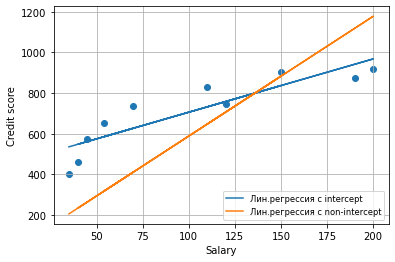

In [5]:
plt.scatter(x,y)
plt.plot(x,a+x*bb, label='Лин.регрессия с intercept')
plt.plot(x,x*b, label='Лин.регрессия с non-intercept')
plt.xlabel('Salary')
plt.ylabel('Credit score')
plt.legend(loc=4,fontsize='small')
plt.grid(True)
plt.show


In [6]:
mse=((y-a-x*bb)**2).sum()/10
mse2=((y-x*b)**2).sum()/10
mse,mse2

(6470.41420117666, 56516.8584157194)

In [7]:
A_mean = 100 * np.mean(np.abs((y - (a+x*bb)) / y))
A_mean

11.46925184356171

In [8]:
r = bb * np.std(x) / np.std(y)
R= r**2
r,R

(0.8874900920739162, 0.7876386635293682)

**2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [9]:
x = salary
y = c_score

alpha = 1e-6
b1 =0.1
n=10

def mse_func(b1,y=y,x=x,n=10):
    return np.sum((b1*x-y)**2)/n

In [10]:
for ind in range(1,1001):
    b1 -= alpha*(2/n)*np.sum((b1*x-y)*x)
    if ind%50==0:
        print(f'{ind}.\tb1={b1}\tmse={mse_func(b1)}')

50.	b1=4.457772104723629	mse=84769.3913878718
100.	b1=5.535619041013072	mse=58245.2515982716
150.	b1=5.802212609962957	mse=56622.59558967255
200.	b1=5.868151593145588	mse=56523.327053798086
250.	b1=5.884460874424522	mse=56517.254144837454
300.	b1=5.888494795528504	mse=56516.882625071215
350.	b1=5.889492541486457	mse=56516.85989676461
400.	b1=5.8897393229605965	mse=56516.85850632468
450.	b1=5.889800361640326	mse=56516.85842126231
500.	b1=5.889815458885515	mse=56516.858416058494
550.	b1=5.88981919302284	mse=56516.85841574016
600.	b1=5.889820116620584	mse=56516.85841572067
650.	b1=5.889820345062314	mse=56516.85841571949
700.	b1=5.889820401564859	mse=56516.85841571943
750.	b1=5.889820415540141	mse=56516.85841571941
800.	b1=5.889820418996772	mse=56516.85841571941
850.	b1=5.889820419851732	mse=56516.85841571941
900.	b1=5.889820420063197	mse=56516.8584157194
950.	b1=5.889820420115502	mse=56516.85841571941
1000.	b1=5.889820420128437	mse=56516.8584157194


**Полученые значения коэффициента $b_1$ можно считать равным расчетным значениям полученным в задании 1**

**3*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [11]:
alpha = 1e-6 #шаг alpha и beta подбирается эксперементально 
beta = 0.02 #шаг alpha и beta подбирается эксперементально 
b0 = 0
b1 = 0.1
n=10

def mse(b0,b1,y=y,x=x,n=10):
    return np.sum((b0+b1*x-y)**2)/n

In [12]:
for ind in range(1, 1001):
    b0 -= beta*(2/n)*np.sum(b0 + b1*x - y)
    b1 -= alpha*(2/n)*np.sum((b0 + b1*x - y)*x)
    if ind%50==0:
        print(f'{ind}.\tb0={b0}\tb1={b1}\tmse={mse(b0,b1)}')


50.	b0=430.8400120255544	b1=2.4794247919628236	mse=7304.322300944083
100.	b0=447.2612757369063	b1=2.583164978086836	mse=6475.793692082029
150.	b0=447.19222317990415	b1=2.5937278816119047	mse=6473.0140048563335
200.	b0=446.6067642372335	b1=2.5992539430320516	mse=6472.070945923877
250.	b0=446.1179752169001	b1=2.603549148107158	mse=6471.470395228911
300.	b0=445.72685042819666	b1=2.6069738824438966	mse=6471.087523904405
350.	b0=445.41452818996083	b1=2.6097081205552404	mse=6470.84344332084
400.	b0=445.16515781568745	b1=2.6118912241483376	mse=6470.687842330505
450.	b0=444.96605174251835	b1=2.613634290005498	mse=6470.5886469571715
500.	b0=444.80707849674195	b1=2.6150260146582207	mse=6470.5254100716165
550.	b0=444.6801487043416	b1=2.616137216232931	mse=6470.485096662244
600.	b0=444.5788035244707	b1=2.617024438384056	mse=6470.459396930814
650.	b0=444.4978859929087	b1=2.6177328275398835	mse=6470.443013394768
700.	b0=444.43327860928747	b1=2.6182984301856904	mse=6470.432568917786
750.	b0=444.38169

**Полученые значения коэффициентов $b_0$ и $b_1$ можно считать равным расчетным значениям полученным в задании 1 для intercept**